In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import plotly.express as px

In [2]:
df2 = pd.read_csv("retail_store_inventory_adjusted_int.csv")

In [6]:
df2.drop(columns=["Competitor Pricing", "Units Ordered"]).sample(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Price,Discount,Weather Condition,Holiday/Promotion,Seasonality,Units Sold
19990,2022-12-01,S004,P0009,Toys,South,310,46.69,15,Rainy,1,Spring,278
34844,2023-06-17,S001,P0020,Furniture,East,152,27.12,20,Rainy,0,Spring,105
768,2023-01-28,S003,P0011,Electronics,West,86,19.08,10,Cloudy,0,Summer,168
27173,2023-01-20,S005,P0014,Toys,South,72,15.46,10,Cloudy,1,Spring,186
12601,2022-02-16,S004,P0011,Groceries,East,158,99.41,20,Snowy,0,Autumn,2


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Ordered       73100 non-null  int64  
 7   Price               73100 non-null  float64
 8   Discount            73100 non-null  int64  
 9   Weather Condition   73100 non-null  object 
 10  Holiday/Promotion   73100 non-null  int64  
 11  Competitor Pricing  73100 non-null  float64
 12  Seasonality         73100 non-null  object 
 13  Units Sold          73100 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 7.8+ MB


In [21]:
print(df2.duplicated().sum())

0


In [20]:
print(df2.isnull().sum())

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
Units Sold            0
dtype: int64


In [23]:
df2.describe()

,Inventory Level,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Units Sold
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,110.004473,55.135108,10.009508,0.497305,55.146077,124.952503
std,129.949514,52.277448,26.021945,7.083746,0.499996,26.191408,101.533759
min,50.000000,20.000000,10.000000,0.000000,0.000000,5.030000,0.000000
25%,162.000000,65.000000,32.650000,5.000000,0.000000,32.680000,44.000000
50%,273.000000,110.000000,55.050000,10.000000,0.000000,55.010000,98.000000
75%,387.000000,155.000000,77.860000,15.000000,1.000000,77.820000,184.000000
max,500.000000,200.000000,100.000000,20.000000,1.000000,104.940000,628.000000


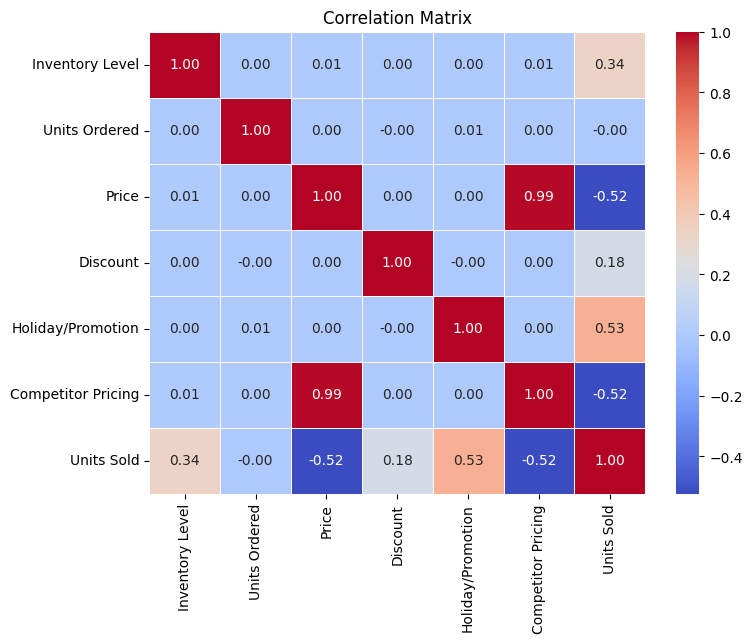

In [24]:
correlation_matrix = df2.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix") 
plt.show()

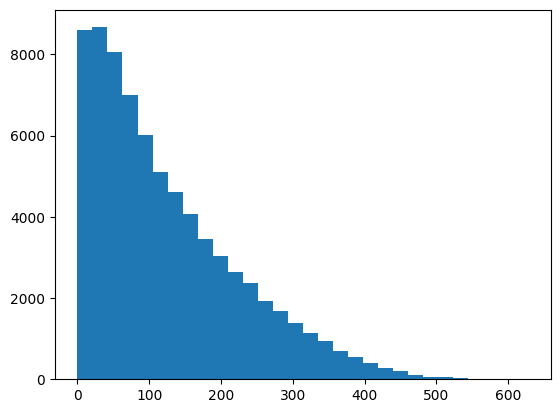

In [25]:
plt.hist(df2["Units Sold"], bins=30)
plt.show()

In [4]:
features = ["Category", "Price", "Discount", "Inventory Level",
            "Weather Condition", "Holiday/Promotion", "Seasonality"]
target = "Units Sold" 
categorical_features = ["Weather Condition", "Holiday/Promotion", "Seasonality", "Category"]
numerical_features = list(set(features) - set(categorical_features))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df2[features], df2[target], test_size=0.2, random_state=42)

models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  

}

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}


In [ ]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)  
results_df 

,MAE,RMSE,R²
XGBoost,26.878165,37.934448,0.860595
SVR,27.041373,38.968827,0.852889
RandomForest,28.506108,40.122418,0.844050
LinearRegression,34.276229,44.892393,0.804766
DecisionTree,39.043707,55.890191,0.697391


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df2[features], df2[target], test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

xgb_model = XGBRegressor(random_state=42)

pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", xgb_model)
])

search_space = {
    "regressor__n_estimators": [100, 200, 500],
    "regressor__learning_rate": [1, 0.1, 0.01, 0.001],
    "regressor__max_depth": [3, 6, 9],
    "regressor__gamma": [0.01, 0.1]  
}

In [10]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, search_space, cv=5, scoring='r2', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Price',
                                                                          'Discount',
                                                                          'Inventory '
                                                                          'Level']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Weather '
                                                                          'Condition',
                                                                          'Holiday/Promotion',
                                                                          'Seasonality',
                                                                          'Category'])])),
                                       ('regressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsa...
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor__gamma': [0.01, 0.1],
                         'regressor__learning_rate': [1, 0.1, 0.01, 0.001],
                         'regressor__max_depth': [3, 6, 9],
                         'regressor__n_estimators': [100, 200, 500]},
             scoring='r2', verbose=1)

In [13]:
print("Best parameters :", grid_search.best_params_)
print("Best R2 score :", grid_search.best_score_)

Best parameters : {'regressor__gamma': 0.01, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 500}
Best R2 score : 0.8602255693422058
